In [1]:
#!pip install "stable-baselines3[extra]>=2.0.0a4"

In [2]:
#!pip install highway-env

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [4]:
import gymnasium as gym
import highway_env
import numpy as np

from stable_baselines3 import HerReplayBuffer, SAC, DDPG
from stable_baselines3.common.noise import NormalActionNoise

In [6]:
env = gym.make("parking-v0")

In [7]:
# SAC hyperparams:
model = SAC(
    "MultiInputPolicy",
    env,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=4,
        goal_selection_strategy="future",
    ),
    verbose=1,
    buffer_size=int(1e6),
    learning_rate=1e-3,
    gamma=0.95,
    batch_size=256,
    policy_kwargs=dict(net_arch=[256, 256, 256]),
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [14]:
# Train for 1e5 steps
model.learn(int(1e5))
# Save the trained agent
model.save('her_sac_highway')

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -72.9    |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 8        |
|    time_elapsed    | 63       |
|    total_timesteps | 539      |
| train/             |          |
|    actor_loss      | -1.99    |
|    critic_loss     | 0.0685   |
|    ent_coef        | 0.263    |
|    ent_coef_loss   | -4.45    |
|    learning_rate   | 0.001    |
|    n_updates       | 1338     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 102      |
|    ep_rew_mean     | -52.6    |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 8        |
|    time_elapsed    | 101      |
|    total_timesteps | 820      |
| train/             |          |
|    actor_los

In [31]:
model.save('her_sac_highway2')

In [15]:
model = SAC.load('her_sac_highway', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [19]:
# we use the gym >v.26 API here. Note that you could also wrap the env in a DummyVecEnv
# which allows you to use a simplified API
obs, _ = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    done = truncated or terminated
    episode_reward += reward
    if done or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs, _ = env.reset()

Reward: -6.006880782620701 Success? True
Reward: -5.223140824774855 Success? True
Reward: -8.721458287126891 Success? True
Reward: -7.229653015942438 Success? True


In [25]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from copy import deepcopy

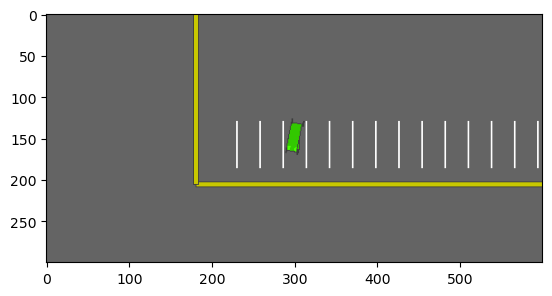

Episode length -6.616866355931969


In [30]:
from copy import deepcopy

def run_one_episode(env, agent, display=True):
    display_env = deepcopy(env)
    done = False
    obs, _ = display_env.reset()

    rewards = 0

    while not done:
        #action = agent.get_action(state['observation'])
        action, _ = agent.predict(obs, deterministic=True)

        obs, reward, terminated, truncated, info = display_env.step(action)
        done = truncated or terminated
        rewards += reward

        if display:
            clear_output(wait=True)
            plt.imshow(display_env.render())
            plt.show()
    if display:
        display_env.close()
    print(f'Episode length {rewards}')

env = gym.make("parking-v0", render_mode='rgb_array')
run_one_episode(env, model, display=True)